In [1]:
#Importing the required libraries.
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
import lightgbm as lightgbm
import xgboost as xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.inspection import permutation_importance

In [2]:
#Dataset1.
customer= pd.read_csv('teleco.csv') 

In [3]:
customer.shape

(100000, 100)

In [4]:
customer.isnull().sum()

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

In [5]:
percent_missing = customer.isnull().sum() * 100 / len(customer)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
print(missing_value_df.to_string())

                  percent_missing
rev_Mean                    0.357
mou_Mean                    0.357
totmrc_Mean                 0.357
da_Mean                     0.357
ovrmou_Mean                 0.357
ovrrev_Mean                 0.357
vceovr_Mean                 0.357
datovr_Mean                 0.357
roam_Mean                   0.357
change_mou                  0.891
change_rev                  0.891
drop_vce_Mean               0.000
drop_dat_Mean               0.000
blck_vce_Mean               0.000
blck_dat_Mean               0.000
unan_vce_Mean               0.000
unan_dat_Mean               0.000
plcd_vce_Mean               0.000
plcd_dat_Mean               0.000
recv_vce_Mean               0.000
recv_sms_Mean               0.000
comp_vce_Mean               0.000
comp_dat_Mean               0.000
custcare_Mean               0.000
ccrndmou_Mean               0.000
cc_mou_Mean                 0.000
inonemin_Mean               0.000
threeway_Mean               0.000
mou_cvce_Mean 

In [6]:
customer.fillna(customer.mean(), inplace=True)
for column in customer.columns:
    if customer[column].dtype == 'object':
        customer[column].fillna(customer[column].mode()[0], inplace=True)

/var/folders/j5/9fvnh0857k3_lqjpjrk029hw0000gn/T/ipykernel_749/2349601179.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  customer.fillna(customer.mean(), inplace=True)


In [7]:
percent_missing = customer.isnull().sum() * 100 / len(customer)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
print(missing_value_df.to_string())

                  percent_missing
rev_Mean                      0.0
mou_Mean                      0.0
totmrc_Mean                   0.0
da_Mean                       0.0
ovrmou_Mean                   0.0
ovrrev_Mean                   0.0
vceovr_Mean                   0.0
datovr_Mean                   0.0
roam_Mean                     0.0
change_mou                    0.0
change_rev                    0.0
drop_vce_Mean                 0.0
drop_dat_Mean                 0.0
blck_vce_Mean                 0.0
blck_dat_Mean                 0.0
unan_vce_Mean                 0.0
unan_dat_Mean                 0.0
plcd_vce_Mean                 0.0
plcd_dat_Mean                 0.0
recv_vce_Mean                 0.0
recv_sms_Mean                 0.0
comp_vce_Mean                 0.0
comp_dat_Mean                 0.0
custcare_Mean                 0.0
ccrndmou_Mean                 0.0
cc_mou_Mean                   0.0
inonemin_Mean                 0.0
threeway_Mean                 0.0
mou_cvce_Mean 

In [8]:
train_label=customer['churn']

In [9]:
train_label_v=train_label

In [10]:
del customer['churn']

In [11]:
cat_customer= customer.select_dtypes(include=['object']).columns

In [12]:
customer_cat=customer[cat_customer]

In [13]:
num_customer=customer.select_dtypes(include=['float64', 'int64']).columns

In [14]:
customer_num=customer[num_customer]

In [15]:
del customer_num['change_rev']
del customer_num['change_mou']

In [16]:
del customer_num['Customer_ID']

In [17]:
z=customer_cat
#label encoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
z=z.astype(str)
z[cat_customer] = z[cat_customer].apply(lambda col: label.fit_transform(col))


In [18]:
frames = [customer_num, z]
customer_updated=pd.concat(frames,axis=1)

In [19]:
customer_updated.isnull().sum()

rev_Mean       0
mou_Mean       0
totmrc_Mean    0
da_Mean        0
ovrmou_Mean    0
              ..
kid3_5         0
kid6_10        0
kid11_15       0
kid16_17       0
creditcd       0
Length: 96, dtype: int64

In [20]:
percent_missing = customer_updated.isnull().sum() * 100 / len(customer)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
print(missing_value_df.to_string())

                  percent_missing
rev_Mean                      0.0
mou_Mean                      0.0
totmrc_Mean                   0.0
da_Mean                       0.0
ovrmou_Mean                   0.0
ovrrev_Mean                   0.0
vceovr_Mean                   0.0
datovr_Mean                   0.0
roam_Mean                     0.0
drop_vce_Mean                 0.0
drop_dat_Mean                 0.0
blck_vce_Mean                 0.0
blck_dat_Mean                 0.0
unan_vce_Mean                 0.0
unan_dat_Mean                 0.0
plcd_vce_Mean                 0.0
plcd_dat_Mean                 0.0
recv_vce_Mean                 0.0
recv_sms_Mean                 0.0
comp_vce_Mean                 0.0
comp_dat_Mean                 0.0
custcare_Mean                 0.0
ccrndmou_Mean                 0.0
cc_mou_Mean                   0.0
inonemin_Mean                 0.0
threeway_Mean                 0.0
mou_cvce_Mean                 0.0
mou_cdat_Mean                 0.0
mou_rvce_Mean 

In [21]:
#normalizing the values
x_norm = (customer_updated - customer_updated.min(axis=0)) / (customer_updated.max(axis=0) - customer_updated.min(axis=0))
customer_updated[:] = x_norm

In [22]:
customer_updated.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean',
       'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean',
       'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean',
       'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean',
       'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean',
       'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean',
       'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean',
       'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean',
       'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean',
       'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean',
       'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs', 'actvsubs',
       'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev',
       'avgmou', 'avgqty', 'avg3mou', 'avg3qty',

In [23]:
#Method1: VIF (not the best method) performed on first dataset.
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

def vify(cus):
    v=cus
    vif_data = pd.DataFrame()
    vif_data["feature"] = v.columns
    vif_data["VIF"] = [vif(v.values, i)for i in range(len(v.columns))]
    return vif_data

In [24]:
v_r1= vify(customer_updated)

In [25]:
hcorr= v_r1[v_r1['VIF']>10].feature.to_list()

In [26]:
v1=customer_updated.drop(columns=hcorr)


In [27]:
v1

,da_Mean,roam_Mean,recv_sms_Mean,threeway_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,callfwdv_Mean,callwait_Mean,uniqsubs,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,0.001553,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.001567,0.005128,...,0.0,0.4,0.000000,0.5625,0.0,0.0,0.0,0.0,0.0,1.0
1,0.001553,0.000000,0.0,0.005051,0.013434,0.012195,0.002170,0.0,0.026646,0.000000,...,0.0,0.4,0.000000,1.0000,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.4,0.000000,0.5625,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,0.000000,0.0,0.000000,0.000142,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.4,0.214286,0.8750,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.000000,0.0,0.000000,0.006000,0.001284,0.000215,0.0,0.000000,0.000000,...,0.0,0.4,1.000000,0.3750,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.005576,0.000349,0.0,0.000000,0.000932,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.4,0.000000,0.8125,0.0,0.0,0.0,1.0,0.0,1.0
99996,0.005576,0.000349,0.0,0.005051,0.008262,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,1.0,0.000000,0.5625,0.0,0.0,1.0,1.0,1.0,1.0
99997,0.005576,0.000349,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.4,0.000000,0.8750,1.0,1.0,0.0,0.0,0.0,0.0
99998,0.005576,0.000349,0.0,0.015152,0.034890,0.032092,0.019303,0.0,0.000000,0.000000,...,0.0,0.4,0.000000,0.8125,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
customer_v=v1

In [29]:
customer_v.columns

Index(['da_Mean', 'roam_Mean', 'recv_sms_Mean', 'threeway_Mean',
       'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean',
       'callfwdv_Mean', 'callwait_Mean', 'uniqsubs', 'hnd_price', 'phones',
       'models', 'truck', 'rv', 'lor', 'adults', 'income', 'numbcars',
       'forgntvl', 'eqpdays', 'new_cell', 'crclscod', 'asl_flag',
       'prizm_social_one', 'area', 'dualband', 'refurb_new', 'ownrent',
       'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic',
       'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

In [30]:
x_norm = (customer_v - customer_v.min(axis=0)) / (customer_v.max(axis=0) - customer_v.min(axis=0))
customer_v[:] = x_norm

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(customer_v, train_label_v, test_size=0.3, random_state=42)

In [32]:
#Implementing the models after VIF.
xg=xgboost.XGBClassifier()
xg.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(xg, X_train, y_train, cv=k_folds).mean())

0.5936000000000001


In [33]:
pred_xg=xg.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_xg)
xg_m=metrics.auc(fpr, tpr)
xg_m

0.5925946954822328

In [34]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(dt, X_train, y_train, cv=k_folds).mean())

0.5325


In [35]:
pred=dt.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
dt_m=metrics.auc(fpr, tpr)
dt_m

0.5316757486239753

In [36]:
#random Forest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(rf, X_train, y_train, cv=k_folds).mean())

0.5874


In [37]:

pred_rf=rf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_rf)
rf_m=metrics.auc(fpr, tpr)
rf_m

0.5889912178691572

In [38]:
#lightbgm
gbm=lightgbm.LGBMClassifier()
gbm.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(gbm, X_train, y_train, cv=k_folds).mean())

0.6018


In [39]:
pred_gbm=gbm.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_gbm)
gbm_m=metrics.auc(fpr, tpr)
gbm_m

0.5983899757900744

In [40]:
#Method2: hierarchal clustering (not a best method) on firstdataset.
corr2=customer_updated.corr(method='spearman')
data=customer_updated

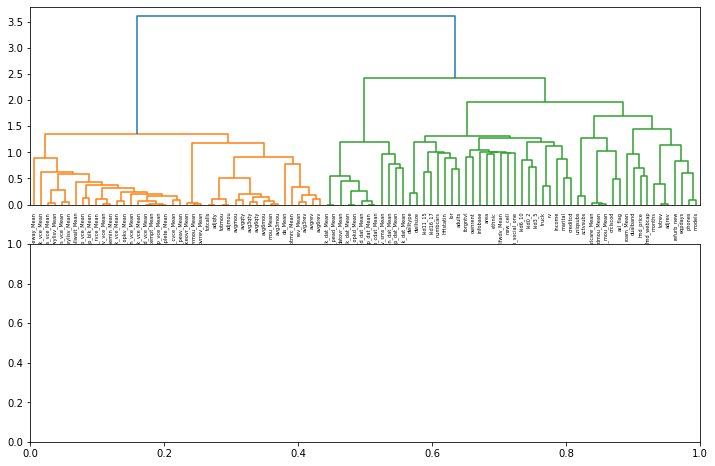

In [41]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))

distance_matrix = 1 - np.abs(corr2)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=data.columns.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

In [42]:
cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

In [43]:
selected_features

[0, 4, 7, 8, 9, 10, 21, 44, 46, 47, 65, 67, 69, 71, 73, 76, 84, 86, 90, 93]

In [44]:
r=customer_updated.columns

In [45]:
r=r[selected_features]

In [46]:
h=customer_updated[r]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(h, train_label_v, test_size=0.3, random_state=42)

In [48]:
#Implementing the models After hierarchial feature selection
xg=xgboost.XGBClassifier()
xg.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(xg, X_train, y_train, cv=k_folds).mean())

0.5852857142857143


In [49]:
from sklearn.metrics import classification_report
pred_xg=xg.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_xg)
r=classification_report(y_test, pred_xg)
xg_m=metrics.auc(fpr, tpr)
print(r)

              precision    recall  f1-score   support

           0       0.60      0.58      0.59     15031
           1       0.59      0.61      0.60     14969

    accuracy                           0.59     30000
   macro avg       0.59      0.59      0.59     30000
weighted avg       0.59      0.59      0.59     30000



In [50]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(dt, X_train, y_train, cv=k_folds).mean())

0.5263714285714286


In [51]:
pred=dt.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
dt_m=metrics.auc(fpr, tpr)
dt_m

0.5288885500528737

In [52]:
#random Forest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(rf, X_train, y_train, cv=k_folds).mean())

0.5748714285714286


In [53]:
pred_rf=rf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_rf)
rf_m=metrics.auc(fpr, tpr)
rf_m

0.5798356632092104

In [54]:
gbm=lightgbm.LGBMClassifier()
gbm.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(gbm, X_train, y_train, cv=k_folds).mean())

0.5901857142857143


In [55]:
pred_gbm=gbm.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_gbm)
gbm_m=metrics.auc(fpr, tpr)
gbm_m

0.5965807969517594

In [56]:
customer_updated.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean',
       'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean',
       'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean',
       'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean',
       'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean',
       'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean',
       'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean',
       'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean',
       'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean',
       'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean',
       'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs', 'actvsubs',
       'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev',
       'avgmou', 'avgqty', 'avg3mou', 'avg3qty',

In [57]:
p1 = customer_updated

In [58]:
p1

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,drop_vce_Mean,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,0.007836,0.017961,0.113102,0.001553,0.000000,0.000000,0.000000,0.000000,0.000000,0.002865,...,0.0,0.4,0.000000,0.5625,0.0,0.0,0.0,0.0,0.0,1.0
1,0.016538,0.039548,0.147263,0.001553,0.005265,0.008255,0.010155,0.000000,0.000000,0.035817,...,0.0,0.4,0.000000,1.0000,0.0,0.0,0.0,0.0,0.0,1.0
2,0.006016,0.000840,0.100491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001433,...,0.0,0.4,0.000000,0.5625,0.0,1.0,0.0,0.0,0.0,1.0
3,0.011474,0.000614,0.148579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.4,0.214286,0.8750,1.0,0.0,0.0,0.0,0.0,1.0
4,0.015950,0.046736,0.226354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041547,...,0.0,0.4,1.000000,0.3750,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.008596,...,0.0,0.4,0.000000,0.8125,0.0,0.0,0.0,1.0,0.0,1.0
99996,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.012894,...,0.0,1.0,0.000000,0.5625,0.0,0.0,1.0,1.0,1.0,1.0
99997,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.000000,...,0.0,0.4,0.000000,0.8750,1.0,1.0,0.0,0.0,0.0,0.0
99998,0.016856,0.042072,0.167300,0.005576,0.009506,0.012300,0.014837,0.000617,0.000349,0.080229,...,0.0,0.4,0.000000,0.8125,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#Method3: PCA on first dataset. (not the best method) on first dataset.

In [60]:
pca_1 = PCA(n_components=90)

In [61]:
pca_1.fit(p1)

PCA(n_components=90)

In [62]:
y_pca1 = pca_1.transform(p1)

In [63]:
y_pca1

array([[ 1.33686005e-01, -7.98708405e-02, -1.39824830e-01, ...,
         3.11337330e-07,  5.77680720e-05, -7.60370480e-07],
       [ 5.93404796e-01,  9.51843296e-02,  7.63438136e-01, ...,
        -1.29704024e-05,  1.60603927e-04,  1.04559570e-05],
       [ 2.68290334e-01,  3.15053938e-01,  8.06870973e-01, ...,
        -2.00911151e-05, -2.07561050e-05, -2.78173696e-06],
       ...,
       [-3.87387006e-01, -1.75147774e-01, -1.40189056e-01, ...,
         1.46574362e-05, -2.17638592e-05,  8.18596557e-06],
       [-7.75649250e-01, -2.74569429e-01, -1.47022724e-01, ...,
        -1.04239993e-05, -8.35729776e-05,  1.42595377e-05],
       [-4.52213654e-01, -1.70839769e-01, -2.32262976e-01, ...,
        -3.68766458e-05, -7.34193476e-05,  8.03997851e-06]])

In [64]:
y_pca1.shape

(100000, 90)

In [65]:
dt = DecisionTreeClassifier()
xg = xgboost.XGBRegressor()
rf = RandomForestClassifier()
gbm = lightgbm.LGBMClassifier()

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y_pca1, train_label, test_size=0.3, random_state=42)

In [67]:
#1.desicion tree. 
dt.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(dt, X_train, y_train, cv=k_folds).mean())

0.5308714285714285


In [68]:
pred_dt = dt.predict(X_test)
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, pred_dt)
dt_m = metrics.auc(fpr_dt, tpr_dt)
dt_m

0.5263615437041933

In [69]:
#2.Random Forest.
rf.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(rf, X_train,y_train, cv=k_folds).mean())

0.5874428571428572


In [70]:
pred_rf = rf.predict(X_test)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, pred_rf)
rf_m = metrics.auc(fpr_rf, tpr_rf)
rf_m

0.5867118481337158

In [71]:
#3.XGBoost.
xg.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(xg, X_train,y_train, cv=k_folds).mean())

0.027551847891131166


In [72]:
pred_xg = xg.predict(X_test)
fpr_xg, tpr_xg, thresholds_xg = metrics.roc_curve(y_test, pred_xg)
xg_m = metrics.auc(fpr_xg, tpr_xg)
xg_m

0.6294182127595664

In [73]:
#4.Light GBM.
gbm.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(gbm, X_train,y_train, cv=k_folds).mean())

0.6056142857142859


In [74]:
pred_gbm = gbm.predict(X_test)
fpr_gbm, tpr_gbm, thresholds_gbm = metrics.roc_curve(y_test, pred_gbm)
gbm_m = metrics.auc(fpr_gbm, tpr_gbm)
gbm_m

0.6075577571689095

In [75]:
#Reading in the dataset 2.
customer2 = pd.read_csv('second.csv')

In [76]:
customer2

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [77]:
customer2.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [78]:
percent_missing = customer2.isnull().sum() * 100 / len(customer)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
print(missing_value_df.to_string())

                           percent_missing
CustomerID                           0.000
Churn                                0.000
MonthlyRevenue                       0.156
MonthlyMinutes                       0.156
TotalRecurringCharge                 0.156
DirectorAssistedCalls                0.156
OverageMinutes                       0.156
RoamingCalls                         0.156
PercChangeMinutes                    0.367
PercChangeRevenues                   0.367
DroppedCalls                         0.000
BlockedCalls                         0.000
UnansweredCalls                      0.000
CustomerCareCalls                    0.000
ThreewayCalls                        0.000
ReceivedCalls                        0.000
OutboundCalls                        0.000
InboundCalls                         0.000
PeakCallsInOut                       0.000
OffPeakCallsInOut                    0.000
DroppedBlockedCalls                  0.000
CallForwardingCalls                  0.000
CallWaiting

In [79]:
customer2.fillna(customer2.mean(), inplace=True)
for column in customer2.columns:
    if customer2[column].dtype == 'object':
        customer2[column].fillna(customer2[column].mode()[0], inplace=True)

/var/folders/j5/9fvnh0857k3_lqjpjrk029hw0000gn/T/ipykernel_749/1598678812.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  customer2.fillna(customer2.mean(), inplace=True)


In [80]:
percent_missing = customer2.isnull().sum() * 100 / len(customer)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
print(missing_value_df.to_string())

                           percent_missing
CustomerID                             0.0
Churn                                  0.0
MonthlyRevenue                         0.0
MonthlyMinutes                         0.0
TotalRecurringCharge                   0.0
DirectorAssistedCalls                  0.0
OverageMinutes                         0.0
RoamingCalls                           0.0
PercChangeMinutes                      0.0
PercChangeRevenues                     0.0
DroppedCalls                           0.0
BlockedCalls                           0.0
UnansweredCalls                        0.0
CustomerCareCalls                      0.0
ThreewayCalls                          0.0
ReceivedCalls                          0.0
OutboundCalls                          0.0
InboundCalls                           0.0
PeakCallsInOut                         0.0
OffPeakCallsInOut                      0.0
DroppedBlockedCalls                    0.0
CallForwardingCalls                    0.0
CallWaiting

In [81]:
del customer2['CustomerID']

In [82]:
del customer2['ServiceArea']

In [83]:
train_label2=customer2['Churn']

In [84]:
del customer2['Churn']

In [85]:
train_label2

0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
51042    Yes
51043     No
51044    Yes
51045     No
51046     No
Name: Churn, Length: 51047, dtype: object

In [86]:
train_label2=train_label2.replace('No',0)

In [87]:
train_label2=train_label2.replace('Yes',1)

In [88]:
train_label2

0        1
1        1
2        0
3        0
4        1
        ..
51042    1
51043    0
51044    1
51045    0
51046    0
Name: Churn, Length: 51047, dtype: int64

In [89]:
cat_customer2= customer2.select_dtypes(include=['object']).columns
customer_cat2=customer2[cat_customer2]
num_customer2=customer2.select_dtypes(include=['float64', 'int64']).columns
customer_num2=customer2[num_customer2]

In [90]:
customer_num2

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.7,0.7,...,2.0,2.0,361.0,62.0,0.0,1,0,0,4,0
1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.3,0.0,...,2.0,1.0,1504.0,40.0,42.0,0,0,0,5,0
2,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.0,0.0,...,1.0,1.0,1812.0,26.0,26.0,0,0,0,6,0
3,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.0,7.7,...,9.0,4.0,458.0,30.0,0.0,0,0,0,6,0
4,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.0,0.0,...,4.0,3.0,852.0,46.0,54.0,0,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,9.3,2.7,...,2.0,2.0,526.0,68.0,64.0,0,0,0,6,0
51043,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,16.7,0.7,...,2.0,2.0,464.0,48.0,48.0,0,0,0,9,1
51044,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,71.7,4.3,...,3.0,2.0,378.0,36.0,0.0,0,0,0,7,1
51045,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,0.0,0.0,...,2.0,2.0,433.0,32.0,0.0,0,0,0,9,0


In [91]:
customer_cat2

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,No,No,Yes,No,No,Known,Yes,Yes,No,No,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,No,No,No,No,Known,Yes,Yes,No,No,...,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,Yes,No,No,No,No,Unknown,No,No,No,No,...,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,No,No,Yes,No,No,Known,Yes,Yes,No,No,...,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
4,No,No,No,No,No,Known,Yes,Yes,No,No,...,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,...,Yes,No,No,No,60,No,1-Highest,Suburban,Other,Yes
51043,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,...,Yes,No,No,No,60,No,3-Good,Other,Other,No
51044,No,No,Yes,No,No,Known,No,No,No,No,...,Yes,No,No,No,80,No,5-Low,Other,Clerical,No
51045,Yes,No,Yes,No,No,Unknown,No,No,No,No,...,No,No,No,No,30,No,5-Low,Other,Other,No


In [92]:
z2=customer_cat2
#label encoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
z2=z2.astype(str)
z2[cat_customer2] = z2[cat_customer2].apply(lambda col: label.fit_transform(col))

In [93]:
z2

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0,0,1,0,0,0,1,1,0,0,...,1,0,0,0,8,1,0,2,4,0
1,1,0,0,0,0,0,1,1,0,0,...,1,1,0,0,8,0,3,2,4,2
2,1,0,0,0,0,1,0,0,0,0,...,1,1,0,0,15,0,2,3,1,2
3,0,0,1,0,0,0,1,1,0,0,...,1,1,0,0,0,0,3,0,3,0
4,0,0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,0,1,1,0,0,0,1,1,0,0,...,1,0,0,0,13,0,0,2,3,2
51043,1,0,1,0,0,0,1,1,0,0,...,1,0,0,0,13,0,2,0,3,0
51044,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,14,0,4,0,0,0
51045,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,8,0,4,0,3,0


In [94]:
frames2 = [customer_num2, z2]
customer_updated2=pd.concat(frames2,axis=1)

In [95]:
customer_updated2.isnull().sum()

MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
RetentionCalls               0
RetentionOffersAccepted      0
ReferralsMadeBySubscriber    0
IncomeGr

In [96]:
train_label2.value_counts()

0    36336
1    14711
Name: Churn, dtype: int64

In [97]:
#applying SVM smote 
oversampler=SMOTE()
customer_updated2,train_label2=oversampler.fit_resample(customer_updated2,train_label2)

In [98]:
train_label2.value_counts()

1    36336
0    36336
Name: Churn, dtype: int64

In [99]:
#Method2: on second dataset.
corr2=customer_updated2.corr(method='spearman')

In [100]:
data2=customer_updated2

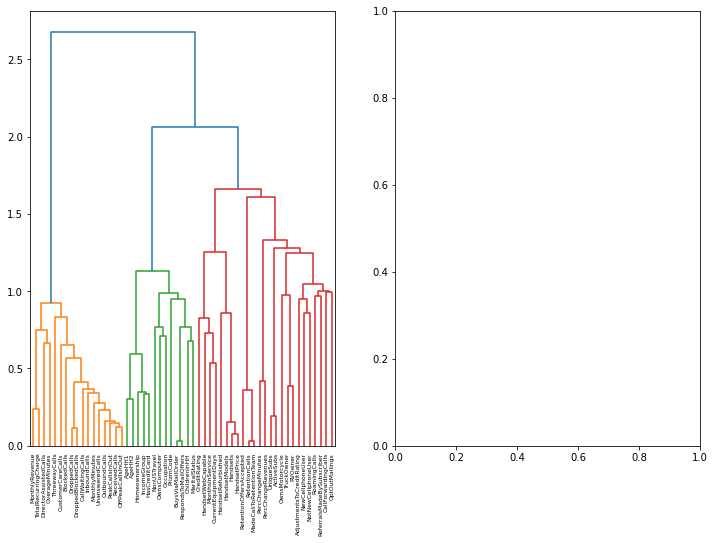

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

distance_matrix = 1 - np.abs(corr2)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=data2.columns.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

In [102]:
cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features2 = [v[0] for v in cluster_id_to_feature_ids.values()]

In [103]:
selected_features2

[0, 5, 6, 19, 21, 22, 24, 27, 29, 33, 34, 37]

In [104]:
r2=customer_updated2.columns

In [105]:
r2=r2[selected_features2]

In [106]:
z2=customer_updated2

In [107]:
z2=z2[r2]

In [108]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(z2, train_label2, test_size=0.3, random_state=42)

In [109]:
#Implementing the models after Hirarchial feature selection on dataset 2.
xg=xgboost.XGBRegressor()
xg.fit(X_train2,y_train2)
k_folds = KFold(n_splits = 10)
print(cross_val_score(xg, X_train2, y_train2, cv=k_folds).mean())

0.3797758064063115


In [110]:
from sklearn.metrics import classification_report
pred_xg=xg.predict(X_test2)
fpr, tpr, thresholds = metrics.roc_curve(y_test2, pred_xg)
#r=classification_report(y_test2, pred_xg)
xg_m=metrics.auc(fpr, tpr)
xg_m

0.8357970901469832

In [111]:
#decision treee
dt=DecisionTreeClassifier()
dt.fit(X_train2,y_train2)
k_folds = KFold(n_splits = 10)
print(cross_val_score(dt, X_train, y_train, cv=k_folds).mean())

0.5318428571428572


In [112]:
pred2=dt.predict(X_test2)
fpr, tpr, thresholds = metrics.roc_curve(y_test2, pred2)
dt_m=metrics.auc(fpr, tpr)
dt_m

0.6754511540886704

In [113]:
#random Forest
rf=RandomForestClassifier()
rf.fit(X_train2,y_train2)
k_folds = KFold(n_splits = 10)
print(cross_val_score(rf, X_train2, y_train2, cv=k_folds).mean())

0.7327698053862787


In [114]:
pred_rf=rf.predict(X_test2)
fpr, tpr, thresholds = metrics.roc_curve(y_test2, pred_rf)
rf_m=metrics.auc(fpr, tpr)
rf_m

0.7378061493435866

In [115]:
gbm=lightgbm.LGBMClassifier()
gbm.fit(X_train2,y_train2)
k_folds = KFold(n_splits = 10)
print(cross_val_score(gbm, X_train2, y_train2, cv=k_folds).mean())

0.774071161784942


In [116]:
pred_gbm=gbm.predict(X_test2)
fpr, tpr, thresholds = metrics.roc_curve(y_test2, pred_gbm)
gbm_m=metrics.auc(fpr, tpr)
gbm_m

0.7758557798804185

In [117]:
customer_updated2

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,...,1,0,0,0,8,1,0,2,4,0
1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,...,1,1,0,0,8,0,3,2,4,2
2,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,...,1,1,0,0,15,0,2,3,1,2
3,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,...,1,1,0,0,0,0,3,0,3,0
4,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,...,1,0,1,0,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72667,76.406716,246.569562,30.403581,0.199552,124.726590,0.558747,125.017905,39.506267,2.703581,4.610331,...,1,0,0,0,15,0,0,0,3,0
72668,76.070898,1263.891883,58.674397,0.500000,59.194294,0.260232,-322.530241,-20.362017,10.473488,3.172328,...,0,0,0,0,8,0,2,3,3,0
72669,37.296536,459.694376,38.842706,0.096068,0.000000,0.000000,45.296661,-0.323146,6.541564,6.378647,...,0,0,1,0,12,0,1,1,3,1
72670,67.966507,293.651909,27.652127,2.393919,101.565176,0.000000,-288.652272,-47.091327,5.839142,0.460858,...,1,0,0,0,14,0,2,1,2,0


In [118]:
p2 = customer_updated2

In [119]:
pca_2 = PCA(n_components=51)

In [120]:
pca_2.fit(p2)

PCA(n_components=51)

In [121]:
y_pca2 = pca_2.transform(p2)

In [122]:
y_pca2.shape

(72672, 51)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y_pca2, train_label2, test_size=0.3, random_state=42)

In [124]:
#1.desicion tree. 
dt.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(dt, X_train, y_train, cv=k_folds).mean())

0.6304501670925889


In [125]:
pred_dt = dt.predict(X_test)
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, pred_dt)
dt_m = metrics.auc(fpr_dt, tpr_dt)
dt_m

0.6354857544773406

In [126]:
#2.Random Forest.
rf.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(rf, X_train,y_train, cv=k_folds).mean())

0.7383723216040889


In [127]:
pred_rf = rf.predict(X_test)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, pred_rf)
rf_m = metrics.auc(fpr_rf, tpr_rf)
rf_m

0.740700683748026

In [128]:
#3.XGBoost.
xg.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(xg, X_train,y_train, cv=k_folds).mean())

0.2634059777432035


In [129]:
pred_xg = xg.predict(X_test)
fpr_xg, tpr_xg, thresholds_xg = metrics.roc_curve(y_test, pred_xg)
xg_m = metrics.auc(fpr_xg, tpr_xg)
xg_m

0.8026886735620872

In [130]:
#4.Light GBM.
gbm.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(gbm, X_train,y_train, cv=k_folds).mean())

0.7287202673481423


In [131]:
pred_gbm = gbm.predict(X_test)
fpr_gbm, tpr_gbm, thresholds_gbm = metrics.roc_curve(y_test, pred_gbm)
gbm_m = metrics.auc(fpr_gbm, tpr_gbm)
gbm_m

0.7282947873269069

In [132]:
#Method 3: Weight of evidence (best method ) for first dataset
from mlencoders.weight_of_evidence_encoder import WeightOfEvidenceEncoder

enc = WeightOfEvidenceEncoder(cols=customer_updated.columns)
customer_updated = enc.fit_transform(customer_updated, train_label)
customer_updated.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,drop_vce_Mean,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,0.000000,0.556517,0.017520,-0.02246,-0.021778,-0.021308,-0.039820,0.015799,0.010703,-0.011647,...,0.001484,0.009292,0.001218,-0.030494,-0.003983,-0.002123,0.001138,0.002035,-0.002917,-0.022795
1,0.017520,-0.164801,0.000000,-0.02246,0.045300,-0.107643,-0.112533,0.015799,0.010703,-0.060797,...,0.001484,0.009292,0.001218,-0.400201,-0.003983,-0.002123,0.001138,0.002035,-0.002917,-0.022795
2,-0.015816,0.751490,0.094113,0.04202,-0.021778,-0.021308,-0.039820,0.015799,0.010703,-0.028216,...,0.001484,0.009292,0.001218,-0.030494,-0.003983,0.043076,0.001138,0.002035,-0.002917,-0.022795
3,-1.081092,0.199842,0.017520,0.04202,-0.021778,-0.021308,-0.039820,0.015799,0.010703,0.175511,...,0.001484,0.009292,0.052330,0.018434,0.095326,-0.002123,0.001138,0.002035,-0.002917,-0.022795
4,-0.270162,-0.339154,-0.136630,0.04202,-0.021778,-0.021308,-0.039820,0.015799,0.010703,0.063701,...,0.001484,0.009292,-0.037101,0.066336,-0.003983,-0.002123,0.001138,0.002035,-0.002917,-0.022795


In [133]:
customer_updated[customer_updated < 0]=0
customer_updated.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,drop_vce_Mean,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,0.00000,0.556517,0.017520,0.00000,0.0000,0.0,0.0,0.015799,0.010703,0.000000,...,0.001484,0.009292,0.001218,0.000000,0.000000,0.000000,0.001138,0.002035,0.0,0.0
1,0.01752,0.000000,0.000000,0.00000,0.0453,0.0,0.0,0.015799,0.010703,0.000000,...,0.001484,0.009292,0.001218,0.000000,0.000000,0.000000,0.001138,0.002035,0.0,0.0
2,0.00000,0.751490,0.094113,0.04202,0.0000,0.0,0.0,0.015799,0.010703,0.000000,...,0.001484,0.009292,0.001218,0.000000,0.000000,0.043076,0.001138,0.002035,0.0,0.0
3,0.00000,0.199842,0.017520,0.04202,0.0000,0.0,0.0,0.015799,0.010703,0.175511,...,0.001484,0.009292,0.052330,0.018434,0.095326,0.000000,0.001138,0.002035,0.0,0.0
4,0.00000,0.000000,0.000000,0.04202,0.0000,0.0,0.0,0.015799,0.010703,0.063701,...,0.001484,0.009292,0.000000,0.066336,0.000000,0.000000,0.001138,0.002035,0.0,0.0


In [134]:
train_label.value_counts()

0    50438
1    49562
Name: churn, dtype: int64

In [135]:
#applying SVM smote 
oversampler=SMOTE()
customer_updated,train_label=oversampler.fit_resample(customer_updated,train_label)

In [136]:
train_label.value_counts()

1    50438
0    50438
Name: churn, dtype: int64

In [137]:
#feature Selection
from sklearn.feature_selection import SelectPercentile, chi2
customer_updated = SelectPercentile(chi2, percentile=60).fit_transform(customer_updated, train_label)
customer_updated.shape

(100876, 57)

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(customer_updated, train_label, test_size=0.3, random_state=42)

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [140]:
xg=xgboost.XGBClassifier()
xg.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(xg, X_train, y_train, cv=k_folds).mean())

0.8118334880116391


In [141]:
pred_xg=xg.predict(X_test)
fpr_x1, tpr_x1, thresholds_x1 = metrics.roc_curve(y_test, pred_xg)
xg_m=metrics.auc(fpr_x1, tpr_x1)
xg_m

0.8137283310890652

In [142]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(dt, X_train, y_train, cv=k_folds).mean())

0.6820414195333291


In [143]:
pred=dt.predict(X_test)
fpr_d1, tpr_d1, thresholds_d1 = metrics.roc_curve(y_test, pred)
dt_m=metrics.auc(fpr_d1, tpr_d1)
dt_m

0.6844271205783846

In [144]:
#random Forest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(rf, X_train, y_train, cv=k_folds).mean())

0.7988331263535856


In [145]:
pred_rf=rf.predict(X_test)
fpr_r1, tpr_r1, thresholds_r1 = metrics.roc_curve(y_test, pred_rf)
rf_m=metrics.auc(fpr_r1, tpr_r1)
rf_m

0.8002121249254094

In [146]:
#lightbgm
gbm=lightgbm.LGBMClassifier()
gbm.fit(X_train,y_train)
k_folds = KFold(n_splits = 10)
print(cross_val_score(gbm, X_train, y_train, cv=k_folds).mean())

0.8144675494620633


In [147]:
pred_gbm=gbm.predict(X_test)
fpr_l1, tpr_l1, thresholds_l1 = metrics.roc_curve(y_test, pred_gbm)
gbm_m=metrics.auc(fpr_l1, tpr_l1)
gbm_m

0.8125740555222799

In [148]:
#Implementing the stacking Ensemble for the first dataset.
from sklearn.ensemble import StackingClassifier
estimators = [('xg',xgboost.XGBClassifier()),('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier()),('gbm',lightgbm.LGBMClassifier())]
sc=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sc.fit(X_train, y_train)

StackingClassifier(estimators=[('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_r...
                                              

In [149]:
pred_sc=sc.predict(X_test)
fpr_s1, tpr_s1, thresholds_s1 = metrics.roc_curve(y_test, pred_sc)
sc_m=metrics.auc(fpr_s1, fpr_s1)
sc_m

0.5

In [150]:
r=classification_report(y_test, pred_sc)
print(r)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     15056
           1       0.82      0.82      0.82     15207

    accuracy                           0.82     30263
   macro avg       0.82      0.82      0.82     30263
weighted avg       0.82      0.82      0.82     30263



In [151]:
#Implementing different combinations of stacking base models.
from itertools import combinations
r=2
com=list(combinations(estimators, r))
com

[(('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                 predictor=None, random_state=None, ...)),
  ('dt', DecisionTreeClassifier())),
 (('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_byt

In [152]:
m=[]
for c in com:
    sc=StackingClassifier(estimators=c, final_estimator=LogisticRegression())
    sc.fit(X_train, y_train)
    pred_sc=sc.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_sc)
    sc_m=metrics.auc(fpr, tpr)
    m.append(sc_m)

In [153]:
com2=('xg','dt','rf','gbm')
com2=list(combinations(com2, r))
com2

[('xg', 'dt'),
 ('xg', 'rf'),
 ('xg', 'gbm'),
 ('dt', 'rf'),
 ('dt', 'gbm'),
 ('rf', 'gbm')]

In [154]:
m

[0.8146111337995458,
 0.8147678512789883,
 0.8157937138582146,
 0.7997989112276792,
 0.8118118892161008,
 0.812765067712049]

In [155]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(com2, m))

In [156]:
print(res)

('xg', 'dt') 0.8146111337995458
('xg', 'rf') 0.8147678512789883
('xg', 'gbm') 0.8157937138582146
('dt', 'rf') 0.7997989112276792
('dt', 'gbm') 0.8118118892161008
('rf', 'gbm') 0.812765067712049


In [157]:
r=3
com=list(combinations(estimators, r))
com

[(('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                 predictor=None, random_state=None, ...)),
  ('dt', DecisionTreeClassifier()),
  ('rf', RandomForestClassifier())),
 (('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=

In [158]:
q=[]
for c in com:
    sc=StackingClassifier(estimators=c, final_estimator=LogisticRegression())
    sc.fit(X_train, y_train)
    pred_sc=sc.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_sc)
    sc_m=metrics.auc(fpr, tpr)
    q.append(sc_m)

In [159]:
q

[0.8149000291723419, 0.8156930965324641, 0.8155516854478687, 0.813685696369904]

In [160]:
com2=('xg','dt','rf','gbm')
com2=list(combinations(com2, r))
res = "\n".join("{} {}".format(x, y) for x, y in zip(com2, q))
print(res)

('xg', 'dt', 'rf') 0.8149000291723419
('xg', 'dt', 'gbm') 0.8156930965324641
('xg', 'rf', 'gbm') 0.8155516854478687
('dt', 'rf', 'gbm') 0.813685696369904


In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

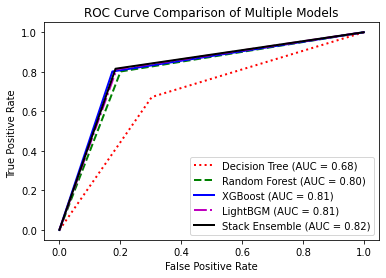

In [162]:
#Plotting the Roc Curve.
roc_auc_d1 = metrics.auc(fpr_d1, tpr_d1)
roc_auc_r1 = metrics.auc(fpr_r1, tpr_r1)
roc_auc_x1 = metrics.auc(fpr_x1, tpr_x1)
roc_auc_l1 = metrics.auc(fpr_l1, tpr_l1)
roc_auc_s1 = metrics.auc(fpr_s1, tpr_s1)

plt.plot(fpr_d1, tpr_d1, "r:", linewidth=2, label="Decision Tree (AUC = %.2f)" % roc_auc_d1)
plt.plot(fpr_r1, tpr_r1, "g--", linewidth=2, label="Random Forest (AUC = %.2f)" % roc_auc_r1)
plt.plot(fpr_x1, tpr_x1, "b-", linewidth=2, label="XGBoost (AUC = %.2f)" % roc_auc_x1)
plt.plot(fpr_l1, tpr_l1, "m-.", linewidth=2, label="LightBGM (AUC = %.2f)" % roc_auc_l1)
plt.plot(fpr_s1, tpr_s1, "k-", linewidth=2, label="Stack Ensemble (AUC = %.2f)" % roc_auc_s1)


plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate ")
plt.title("ROC Curve Comparison of Multiple Models")
plt.show()

In [203]:
#Stacking for the best combinations.
estimators = [('xg',xgboost.XGBClassifier()),('dt',DecisionTreeClassifier()),('gbm',lightgbm.LGBMClassifier())]
sc_c1=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sc_c1.fit(X_train, y_train)

StackingClassifier(estimators=[('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_r...n=None,
                                       

In [204]:
pred_sc_c1=sc_c1.predict(X_test)
fpr_sc1, tpr_sc1, thresholds_sc1 = metrics.roc_curve(y_test, pred_sc_c1)
sc_mc1=metrics.auc(fpr_sc1, fpr_sc1)
sc_mc1

0.5

In [212]:
r_c1=classification_report(y_test, pred_sc_c1)
print(r_c1)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     15056
           1       0.82      0.81      0.82     15207

    accuracy                           0.82     30263
   macro avg       0.82      0.82      0.82     30263
weighted avg       0.82      0.82      0.82     30263



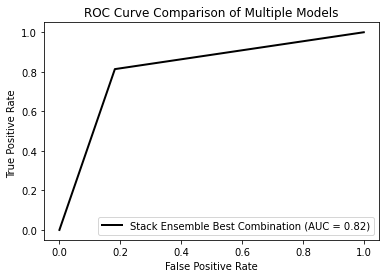

In [207]:
#Plotting the Roc Curve.
roc_auc_c1 = metrics.auc(fpr_sc1, tpr_sc1)
plt.plot(fpr_sc1, tpr_sc1, "k-", linewidth=2, label="Stack Ensemble Best Combination 1 (AUC = %.2f)" % roc_auc_c1)

plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate ")
plt.title("ROC Curve Comparison of Multiple Models")
plt.show()

In [163]:
#Second datset for validating the approach of WOE and stacking.
customer2= pd.read_csv('second.csv') 

In [164]:
customer2.fillna(customer2.mean(), inplace=True)
for column in customer2.columns:
    if customer2[column].dtype == 'object':
        customer2[column].fillna(customer2[column].mode()[0], inplace=True)

/var/folders/j5/9fvnh0857k3_lqjpjrk029hw0000gn/T/ipykernel_749/1598678812.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  customer2.fillna(customer2.mean(), inplace=True)


In [165]:
del customer2['ServiceArea']

In [166]:
train_label2=customer2['Churn']

In [167]:
del customer2['Churn']

In [168]:
train_label2=train_label2.replace('No',0)

In [169]:
train_label2=train_label2.replace('Yes',1)

In [170]:
cat_customer2= customer2.select_dtypes(include=['object']).columns

In [171]:
customer_cat2=customer2[cat_customer2]

In [172]:
num_customer2=customer2.select_dtypes(include=['float64', 'int64']).columns

In [173]:
customer_num2=customer2[num_customer2]

In [174]:
z2=customer_cat2
#label encoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
z2=z2.astype(str)
z2[cat_customer2] = z2[cat_customer2].apply(lambda col: label.fit_transform(col))

In [175]:
frames2 = [customer_num2, z2]
customer_updated2=pd.concat(frames2,axis=1)

In [176]:
#normalizing the values
x_norm = (customer_updated - customer_updated.min(axis=0)) / (customer_updated.max(axis=0) - customer_updated.min(axis=0))
customer_updated[:] = x_norm

In [177]:
enc = WeightOfEvidenceEncoder(cols=customer_updated2.columns)
customer_updated2 = enc.fit_transform(customer_updated2, train_label2)
customer_updated2.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0.0,0.211066,0.316427,0.136343,0.005571,-0.021213,0.0061,0.344598,0.434210,-0.073113,...,-0.013214,0.008279,-0.005946,-0.001871,-0.089412,0.705279,0.096502,-0.033245,-0.031427,-0.085188
1,0.0,-0.051298,0.658080,-0.032963,0.045701,-0.021213,0.0061,-0.031125,0.090737,0.007682,...,-0.013214,-0.035063,-0.005946,-0.001871,-0.089412,-0.028163,-0.135768,-0.033245,-0.031427,-0.013617
2,0.0,0.000000,-0.102025,-0.588099,0.045701,-0.021213,0.0061,-0.115330,0.090737,0.188690,...,-0.013214,-0.035063,-0.005946,-0.001871,0.065183,-0.028163,0.104594,0.056476,-0.038029,-0.013617
3,0.0,0.211066,0.211066,-0.099873,-0.126072,-0.021213,0.0061,-0.782185,0.035176,0.498748,...,-0.013214,-0.035063,-0.005946,-0.001871,-0.118379,-0.028163,-0.135768,-0.009552,0.011057,-0.085188
4,0.0,-0.194399,1.357169,-0.032963,0.045701,-0.021213,0.0061,0.775924,-0.094446,0.188690,...,-0.013214,0.008279,0.036867,-0.001871,-0.118379,-0.028163,0.096502,-0.009552,-0.031427,-0.013617


In [178]:
customer_updated2[customer_updated2 < 0]=0
customer_updated2.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0.0,0.211066,0.316427,0.136343,0.005571,0.0,0.0061,0.344598,0.434210,0.000000,...,0.0,0.008279,0.000000,0.0,0.000000,0.705279,0.096502,0.000000,0.000000,0.0
1,0.0,0.000000,0.658080,0.000000,0.045701,0.0,0.0061,0.000000,0.090737,0.007682,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.000000,0.045701,0.0,0.0061,0.000000,0.090737,0.188690,...,0.0,0.000000,0.000000,0.0,0.065183,0.000000,0.104594,0.056476,0.000000,0.0
3,0.0,0.211066,0.211066,0.000000,0.000000,0.0,0.0061,0.000000,0.035176,0.498748,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.011057,0.0
4,0.0,0.000000,1.357169,0.000000,0.045701,0.0,0.0061,0.775924,0.000000,0.188690,...,0.0,0.008279,0.036867,0.0,0.000000,0.000000,0.096502,0.000000,0.000000,0.0


In [179]:
del customer_updated2['CustomerID']

In [180]:
train_label2.value_counts()

0    36336
1    14711
Name: Churn, dtype: int64

In [181]:
#applying SVM smote 
oversampler=SMOTE()
customer_updated2,train_label2=oversampler.fit_resample(customer_updated2,train_label2)

In [182]:
train_label2.value_counts()

1    36336
0    36336
Name: Churn, dtype: int64

In [183]:
customer_updated2 = SelectPercentile(chi2, percentile=60).fit_transform(customer_updated2, train_label2)
customer_updated2.shape

(72672, 33)

In [184]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(customer_updated2, train_label2, test_size=0.3, random_state=42)

In [185]:
xg=xgboost.XGBClassifier()
xg.fit(X_train2,y_train2)
k_folds = KFold(n_splits = 10)
print(cross_val_score(xg, X_train2, y_train2, cv=k_folds).mean())

0.8420680165126793


In [186]:
from sklearn.metrics import classification_report
pred_xg=xg.predict(X_test2)
fpr_x2, tpr_x2, thresholds_x2 = metrics.roc_curve(y_test2, pred_xg)
#r=classification_report(y_test2, pred_xg)
xg_m=metrics.auc(fpr_x2, tpr_x2)
xg_m

0.8426384078452165

In [187]:
dt=DecisionTreeClassifier()
dt.fit(X_train2,y_train2)
k_folds = KFold(n_splits = 10)
print(cross_val_score(dt, X_train2, y_train2, cv=k_folds).mean())

0.7467859249066248


In [188]:
pred=dt.predict(X_test2)
fpr_d2, tpr_d2, thresholds_d2 = metrics.roc_curve(y_test2, pred)
dt_m=metrics.auc(fpr_d2, tpr_d2)
dt_m

0.7513162936134751

In [189]:
#random Forest
rf=RandomForestClassifier()
rf.fit(X_train2,y_train2)
k_folds = KFold(n_splits = 10)
print(cross_val_score(rf, X_train2, y_train2, cv=k_folds).mean())

0.8418910949479065


In [190]:
pred_rf=rf.predict(X_test2)
fpr_r2, tpr_r2, thresholds_r2 = metrics.roc_curve(y_test2, pred_rf)
rf_m=metrics.auc(fpr_r2, tpr_r2)
rf_m

0.8442086644942899

In [191]:
gbm=lightgbm.LGBMClassifier()
gbm.fit(X_train2,y_train2)
k_folds = KFold(n_splits = 10)
print(cross_val_score(gbm, X_train2, y_train2, cv=k_folds).mean())

0.8475132691173581


In [192]:
pred_gbm=gbm.predict(X_test2)
fpr_l2, tpr_l2, thresholds_l2 = metrics.roc_curve(y_test2, pred_gbm)
gbm_m=metrics.auc(fpr_l2, tpr_l2)
gbm_m

0.8466485172710054

In [193]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingClassifier
estimators = [('xg',xgboost.XGBClassifier()),('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier()),('gbm',lightgbm.LGBMClassifier())]
sc=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sc.fit(X_train2, y_train2)

StackingClassifier(estimators=[('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_r...
                                              

In [194]:
pred_sc=sc.predict(X_test2)
fpr_s2, tpr_s2, thresholds_s2 = metrics.roc_curve(y_test2, pred_sc)
sc_m=metrics.auc(fpr_s2, tpr_s2)
r=classification_report(y_test2, pred_sc)
print(sc_m)
print(r)

0.8480525607063868
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     10851
           1       0.87      0.82      0.84     10951

    accuracy                           0.85     21802
   macro avg       0.85      0.85      0.85     21802
weighted avg       0.85      0.85      0.85     21802



In [195]:
r=2
com=list(combinations(estimators, r))
com

[(('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                 predictor=None, random_state=None, ...)),
  ('dt', DecisionTreeClassifier())),
 (('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_byt

In [196]:
m=[]
for c in com:
    sc=StackingClassifier(estimators=c, final_estimator=LogisticRegression())
    sc.fit(X_train2, y_train2)
    pred_sc=sc.predict(X_test2)
    fpr, tpr, thresholds = metrics.roc_curve(y_test2, pred_sc)
    sc_m=metrics.auc(fpr, tpr)
    m.append(sc_m)

In [197]:
r=2
com2=('xg','dt','rf','gbm')
com2=list(combinations(com2, r))
com2

[('xg', 'dt'),
 ('xg', 'rf'),
 ('xg', 'gbm'),
 ('dt', 'rf'),
 ('dt', 'gbm'),
 ('rf', 'gbm')]

In [198]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(com2, m))
print(res)

('xg', 'dt') 0.8420240307565219
('xg', 'rf') 0.8472046301105481
('xg', 'gbm') 0.8458334152786104
('dt', 'rf') 0.8442911525668236
('dt', 'gbm') 0.8460152054584584
('rf', 'gbm') 0.847632382353238


In [199]:
r=3
com=list(combinations(estimators, r))

In [200]:
q=[]
for c in com:
    sc=StackingClassifier(estimators=c, final_estimator=LogisticRegression())
    sc.fit(X_train, y_train)
    pred_sc=sc.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_sc)
    sc_m=metrics.auc(fpr, tpr)
    q.append(sc_m)

In [201]:
r=3
com2=('xg','dt','rf','gbm')
com2=list(combinations(com2, r))
res = "\n".join("{} {}".format(x, y) for x, y in zip(com2, q))
print(res)

('xg', 'dt', 'rf') 0.8143367892198535
('xg', 'dt', 'gbm') 0.8156602169375408
('xg', 'rf', 'gbm') 0.8156868311526928
('dt', 'rf', 'gbm') 0.8133236910689168


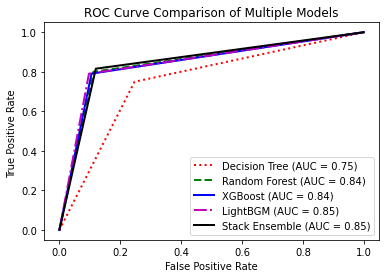

In [202]:
#Plotting the Roc Curve.
roc_auc_d2 = metrics.auc(fpr_d2, tpr_d2)
roc_auc_r2 = metrics.auc(fpr_r2, tpr_r2)
roc_auc_x2 = metrics.auc(fpr_x2, tpr_x2)
roc_auc_l2 = metrics.auc(fpr_l2, tpr_l2)
roc_auc_s2 = metrics.auc(fpr_s2, tpr_s2)

plt.plot(fpr_d2, tpr_d2, "r:", linewidth=2, label="Decision Tree (AUC = %.2f)" % roc_auc_d2)
plt.plot(fpr_r2, tpr_r2, "g--", linewidth=2, label="Random Forest (AUC = %.2f)" % roc_auc_r2)
plt.plot(fpr_x2, tpr_x2, "b-", linewidth=2, label="XGBoost (AUC = %.2f)" % roc_auc_x2)
plt.plot(fpr_l2, tpr_l2, "m-.", linewidth=2, label="LightBGM (AUC = %.2f)" % roc_auc_l2)
plt.plot(fpr_s2, tpr_s2, "k-", linewidth=2, label="Stack Ensemble (AUC = %.2f)" % roc_auc_s2)


plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate ")
plt.title("ROC Curve Comparison of Multiple Models")
plt.show()

In [208]:
#Stacking for the best combinations.
estimators2 = [('xg',xgboost.XGBClassifier()),('rf',RandomForestClassifier())]
sc_c2=StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression())
sc_c2.fit(X_train2, y_train2)

StackingClassifier(estimators=[('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                          

In [209]:
pred_sc_c2=sc_c2.predict(X_test2)
fpr_sc2, tpr_sc2, thresholds_sc2 = metrics.roc_curve(y_test2, pred_sc_c2)
sc_mc2=metrics.auc(fpr_sc2, fpr_sc2)
sc_mc2

0.5

In [210]:
r_c2=classification_report(y_test2, pred_sc_c2)
print(r_c2)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     10851
           1       0.87      0.82      0.84     10951

    accuracy                           0.85     21802
   macro avg       0.85      0.85      0.85     21802
weighted avg       0.85      0.85      0.85     21802



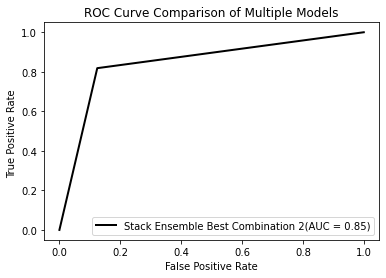

In [211]:
#Plotting the Roc Curve.
roc_auc_c2 = metrics.auc(fpr_sc2, tpr_sc2)
plt.plot(fpr_sc2, tpr_sc2, "k-", linewidth=2, label="Stack Ensemble Best Combination 2(AUC = %.2f)" % roc_auc_c2)

plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate ")
plt.title("ROC Curve Comparison of Multiple Models")
plt.show()